In [1]:
%matplotlib inline

import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

## LEfSe 

In [2]:
lefse_res = pd.read_csv('../input_data/LEfSe_input_gg_rename.txt', sep='\t', index_col=0, header=0)

lefse_res.sort_values('LDA', inplace=True)
lefse_res

,log average,Class,LDA,p-value
Taxon,,,,
Shewanella benthica,3.608535,Digesta,3.659838,0.002093
f__Saprospiraceae,2.595986,Digesta,3.693497,0.022230
Ferrimonas,4.000010,Digesta,3.726514,0.002093
Sulfurimonas,3.582749,Digesta,3.789369,0.036709
c__Alphaproteobacteria,3.807370,Digesta,3.900380,0.003346
Desulfobulbus mediterraneus,2.330468,Digesta,3.921280,0.022230
Photobacterium rosenbergii,3.216755,Digesta,4.040920,0.002093
f__Flavobacteriaceae,2.781488,Digesta,4.053312,0.032630
Candidatus Hepatoplasma,4.324160,Tissue,4.063754,0.002750


In [3]:
digesta_lda = (-lefse_res['LDA'][lefse_res['Class']=='Digesta']).sort_values()
digesta_label = lefse_res.index[lefse_res['Class']=='Digesta']
digesta_label = digesta_label[::-1]

tissue_lda = lefse_res['LDA'][lefse_res['Class']=='Tissue']
tissue_label = lefse_res.index[lefse_res['Class']=='Tissue']

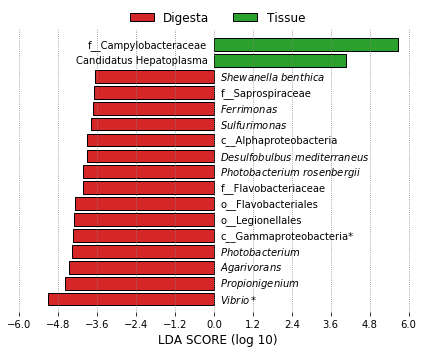

In [4]:
fig, ax = plt.subplots(figsize=(6,5))

ax.barh(digesta_label, digesta_lda,
        label='Digesta',edgecolor='k', color='tab:red')

ax.barh(tissue_label, tissue_lda,
        label='Tissue',edgecolor='k', color='tab:green')
    
ax.legend(ncol=2, fontsize=12,
          edgecolor='w', facecolor='w',
          bbox_to_anchor=(0.75,1.1))

for index, taxon in enumerate(digesta_label):
    if '__' in taxon:
        plt.text(0.2,index, taxon, va='center')
    
    elif ' ' in taxon:
        g, s = taxon.split(' ')
        plt.text(0.2,index, r'$\it{}$ $\it{}$'.format(g,s), va='center')
        
    else:
        plt.text(0.2,index, r'$\it{}$'.format(taxon), va='center')


for index, taxon in enumerate(tissue_label):
    plt.text(-0.2,index+len(digesta_label), taxon, va='center', ha='right')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(-6.0,6.1,1.2))
ax.set_axisbelow(False)
ax.tick_params(axis='x', labelsize=10)
ax.set_yticks([])

ax.set_facecolor('w')
plt.grid(axis='x',c='gray', ls=':')
plt.xlabel('LDA SCORE (log 10)',fontsize=12)

# plt.xlim(0,5)
plt.ylim(-0.8,len(lefse_res.index))

plt.tight_layout()

plt.savefig('../figures/lefse-digesta-tissue.png', dpi=600)
plt.show()

## Heatmap

In [5]:
lefse_res_short_name = pd.read_csv('../input_data/LEfSe_input_gg_rename.txt', sep='\t', index_col=0, header=0)
lefse_res_long_name = pd.read_csv('../input_data/LEfSe_input_gg.txt', sep='\t', index_col=0, header=0)
df_species = pd.read_csv('../input_data/table-l7.txt', sep='\t', index_col=0)
df_species = df_species.T
df_species = df_species[lefse_res_long_name.index]

In [6]:
long2short = dict(zip(lefse_res_long_name.index, lefse_res_short_name.index))

In [7]:
df_species.columns = [long2short[i] for i in df_species.columns]

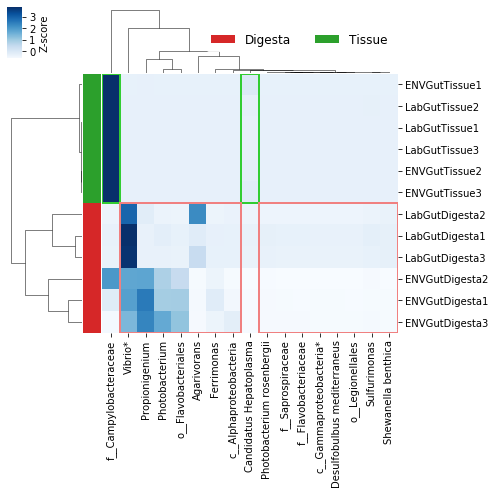

In [8]:
row_colors = ['tab:red' if 'Digesta' in i else 'tab:green' for i in  df_species.index]
g = sns.clustermap(df_species,
                   figsize=(7,6),
                   z_score=0,
                   cmap='Blues',
                   col_cluster=True,
                   row_colors=row_colors,
                   cbar_kws={'label': 'Z-score',
                             'ticks':[0,1,2,3,]})


g.ax_col_dendrogram.bar(0, 0, color='tab:red', label='Digesta')
g.ax_col_dendrogram.bar(0, 0, color='tab:green', label='Tissue')
g.ax_col_dendrogram.legend(loc='right', edgecolor='w', ncol=2, fontsize=12)


ax = g.ax_heatmap

ax.add_patch(Rectangle((0,0), 1, 6, fill=False, edgecolor='limegreen', lw=2))
ax.add_patch(Rectangle((8,0), 1, 6, fill=False, edgecolor='limegreen', lw=2))

ax.add_patch(Rectangle((1,6), 7, 6, fill=False, edgecolor='lightcoral', lw=2))
ax.add_patch(Rectangle((9,6), 8, 6, fill=False, edgecolor='lightcoral', lw=2))

g.savefig('../figures/cluster_heatmap.png', dpi=600)
plt.show()

## Heatmap with humps

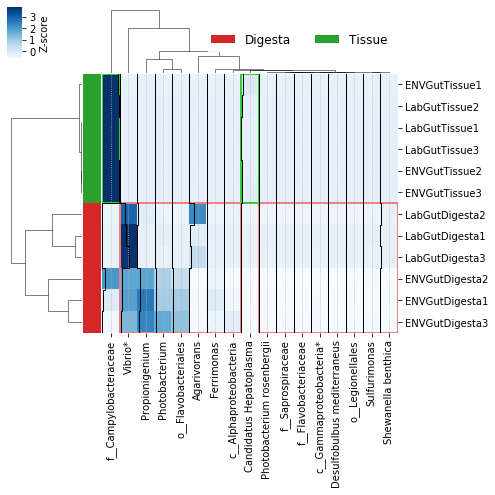

In [9]:
row_colors = ['tab:red' if 'Digesta' in i else 'tab:green' for i in  df_species.index]
g = sns.clustermap(df_species,
                   figsize=(7,6),
                   z_score=0,
                   cmap='Blues',
                   col_cluster=True,
                   row_colors=row_colors,
                   cbar_kws={'label': 'Z-score',
                             'ticks':[0,1,2,3,]})


g.ax_col_dendrogram.bar(0, 0, color='tab:red', label='Digesta')
g.ax_col_dendrogram.bar(0, 0, color='tab:green', label='Tissue')
g.ax_col_dendrogram.legend(loc='right', edgecolor='w', ncol=2, fontsize=12)


ax = g.ax_heatmap

xlabel = [i.get_text() for i in ax.get_xticklabels()]
ylabel = [i.get_text() for i in ax.get_yticklabels()]



y_pos = np.arange(0,len(ylabel)+1)

for index, species in enumerate(xlabel):

    x_pos = df_species.loc[ylabel,species]/100
    x_pos = x_pos.append(pd.Series([x_pos[-1]]))+index
    
    ax.step(x_pos,
            y_pos,
            lw=1,
            where='pre',
            color='k')
    
ax.grid(axis='x', ls=':')

ax.add_patch(Rectangle((0,0), 1, 6, fill=False, edgecolor='limegreen', lw=2))
ax.add_patch(Rectangle((8,0), 1, 6, fill=False, edgecolor='limegreen', lw=2))

ax.add_patch(Rectangle((1,6), 7, 6, fill=False, edgecolor='lightcoral', lw=2))
ax.add_patch(Rectangle((9,6), 8, 6, fill=False, edgecolor='lightcoral', lw=2))

g.savefig('../figures/cluster_heatmap_step.png', dpi=300)
plt.show()

## Heatmap with humps (without rec)

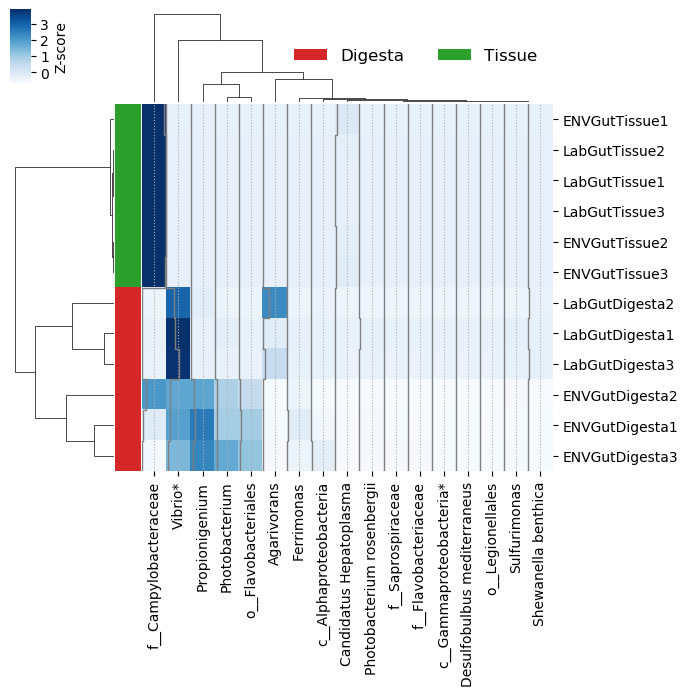

In [10]:
plt.style.use('default')

row_colors = ['tab:red' if 'Digesta' in i else 'tab:green' for i in  df_species.index]
g = sns.clustermap(df_species,
                   figsize=(7,6),
                   z_score=0,
                   cmap='Blues',
                   col_cluster=True,
                   row_colors=row_colors,
                   cbar_kws={'label': 'Z-score',
                             'ticks':[0,1,2,3,]})


g.ax_col_dendrogram.bar(0, 0, color='tab:red', label='Digesta')
g.ax_col_dendrogram.bar(0, 0, color='tab:green', label='Tissue')
g.ax_col_dendrogram.legend(loc='right', edgecolor='w', ncol=2, fontsize=12)


ax = g.ax_heatmap

xlabel = [i.get_text() for i in ax.get_xticklabels()]
ylabel = [i.get_text() for i in ax.get_yticklabels()]



y_pos = np.arange(0,len(ylabel)+1)

for index, species in enumerate(xlabel):

    x_pos = df_species.loc[ylabel,species]/100
    x_pos = x_pos.append(pd.Series([x_pos[-1]]))+index
    
    ax.step(x_pos,
            y_pos,
            lw=1,
            where='pre',
            color='tab:gray')
    
ax.grid(axis='x', ls=':')

g.savefig('../figures/cluster_heatmap_step_no_rect.png', dpi=300)
plt.show()

## Relative abundances

In [11]:
# dataframe for seaborn
df_species_metadata = df_species.copy()
df_species_metadata['Type'] = ['LAB' if 'Lab' in i else 'ENV' for i in df_species_metadata.index]
df_species_metadata['Location'] = ['Tissue' if 'Tissue' in i else 'Digesta' for i in df_species_metadata.index]

In [12]:
pal = sns.color_palette()
pal.as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

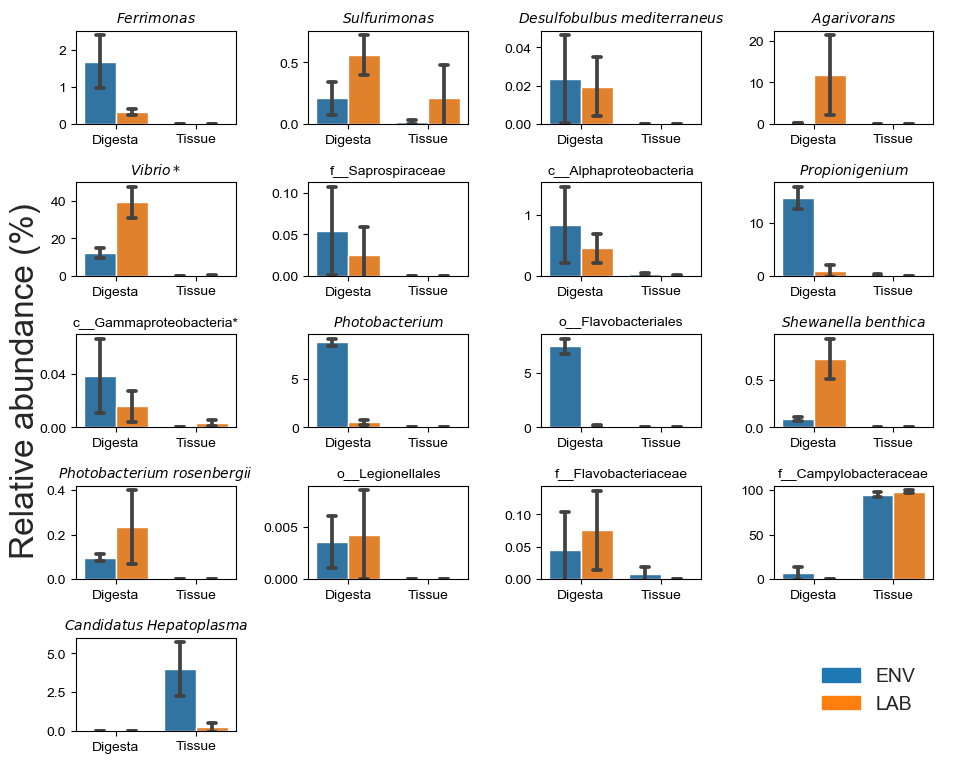

In [13]:
fig, axs = plt.subplots(5, 4, figsize=(10,8))

sns.set_style('darkgrid')
for index, species in enumerate(df_species.columns):
    
    g = sns.barplot(x='Location',
                    y=species,
                    data=df_species_metadata,
                    hue='Type',
                    ax=axs[int(index/4),index%4],
                    ci='sd', # standard deviation
                    capsize=0.1)
       
    if '__' in species:
        g.set_title(species, fontsize=10)
        
    elif ' ' in species:
        genus, s = species.split(' ')
        g.set_title(r'$\it{}$ $\it{}$'.format(genus,s), fontsize=10)
        
    else:    
        g.set_title(r'$\it{}$'.format(species), fontsize=10)

    if species=='c__Gammaproteobacteria*':
        g.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        g.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    g.set_ylim(0)
    g.set_xlabel('')
    g.set_ylabel('')
    g.get_legend().remove()

    
# delete unwanted axes
for i in [1,2,3]:
    fig.delaxes(axs[4,i])


# set common y-label
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='None', bottom=False, left=False)
plt.ylabel('Relative abundance (%)', fontsize=24)
plt.grid(False)


# legend
lab = Patch(color='#1f77b4', label='ENV')
env = Patch(color='#ff7f0e', label='LAB')
plt.legend(handles=[lab, env],
           loc='lower right',
           fontsize=14,
           facecolor='w',
           edgecolor='w')


plt.tight_layout()
plt.savefig('../figures/relative-abundance.png', dpi=600)

plt.show()